# Problem 1 of ML1 homework | Problem 2.9 from ACT book

# Imports


In [2]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np



# For any random initializations

In [3]:
np.random.seed(42)

# Data preview

In [4]:
# Load the CSV file into a DataFrame
df = pd.read_csv("StockBeta.csv")

pd.set_option('display.max_rows', None)  # Display all rows
pd.set_option('display.max_columns', None)  # Display all columns

display(df)


,Date,S_P500,IBM,Apple
0,9/3/13,0.0395,0.0422,0.0039
1,8/1/13,-0.0313,-0.0608,0.0838
2,7/1/13,0.0495,0.0206,0.1412
3,6/3/13,-0.0150,-0.0813,-0.1183
4,5/1/13,0.0208,0.0319,0.0224
5,4/1/13,0.0181,-0.0505,0.0003
6,3/1/13,0.0360,0.0621,0.0028
7,2/1/13,0.0111,-0.0068,-0.0253
8,1/2/13,0.0504,0.0601,-0.1441
9,12/3/12,0.0071,0.0078,-0.0907


In [5]:
df.columns

Index(['Date', 'S_P500', 'IBM', 'Apple'], dtype='object')

# Simple sanity checks

In [6]:
df.isnull().sum()

Date      0
S_P500    0
IBM       0
Apple     0
dtype: int64

# Plot the scatter plots

### IBM  vs S&P-500 

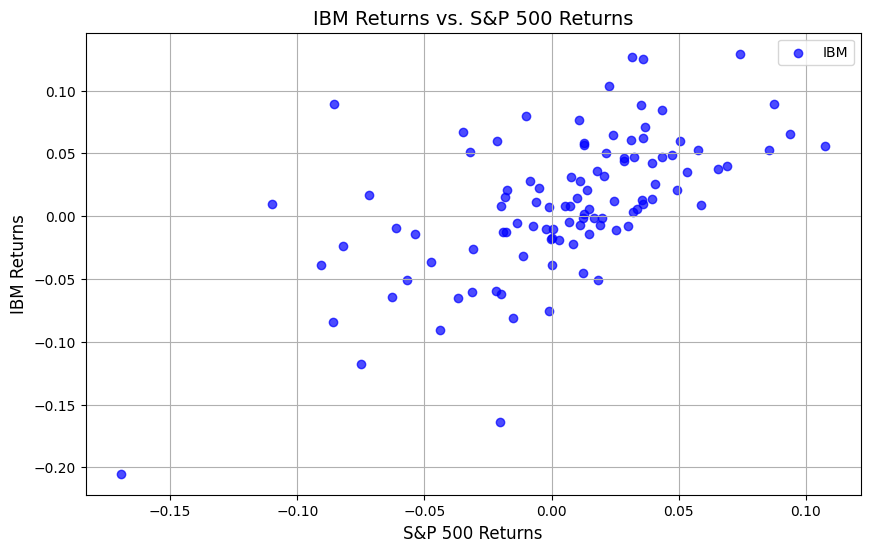

In [8]:

# Create scatter plot for IBM
plt.figure(figsize=(10, 6))
plt.scatter(df['S_P500'], df['IBM'], color='blue', label='IBM', alpha=0.7)
plt.title('IBM Returns vs. S&P 500 Returns', fontsize=14)
plt.xlabel('S&P 500 Returns', fontsize=12)
plt.ylabel('IBM Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

### Apple  vs S&P-500 

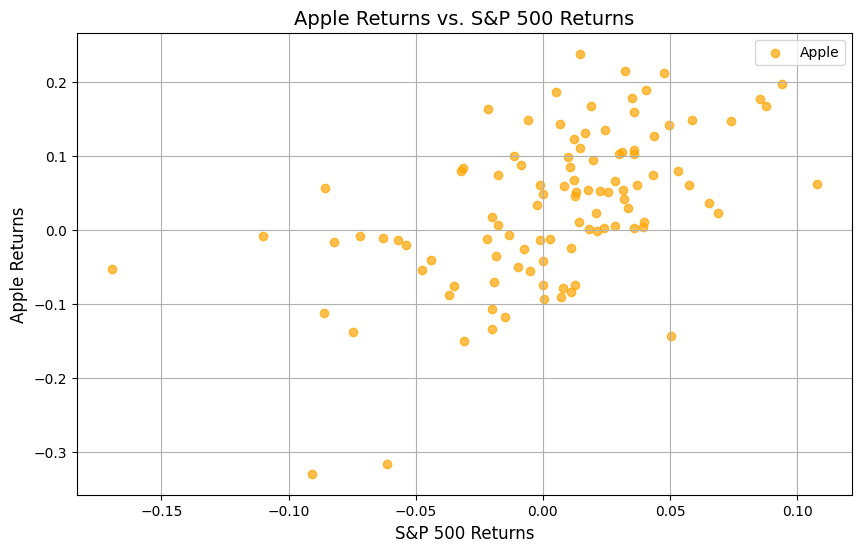

In [9]:
# Create scatter plot for Apple
plt.figure(figsize=(10, 6))
plt.scatter(df['S_P500'], df['Apple'], color='orange', label='Apple', alpha=0.7)
plt.title('Apple Returns vs. S&P 500 Returns', fontsize=14)
plt.xlabel('S&P 500 Returns', fontsize=12)
plt.ylabel('Apple Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# Building simple linear regression model for IBM against S&P-500

In [10]:

# Define the independent variable (S&P 500 returns) and dependent variable (IBM returns)
X_0 = df['S_P500']
y_0 = df['IBM']

# Add a constant, initialized to 1, to the independent variable. This will be the intercept.
X_0 = sm.add_constant(X_0)


In [29]:
print(X_0) 
print(y_0)

     const  S_P500
0      1.0  0.0395
1      1.0 -0.0313
2      1.0  0.0495
3      1.0 -0.0150
4      1.0  0.0208
5      1.0  0.0181
6      1.0  0.0360
7      1.0  0.0111
8      1.0  0.0504
9      1.0  0.0071
10     1.0  0.0028
11     1.0 -0.0198
12     1.0  0.0242
13     1.0  0.0198
14     1.0  0.0126
15     1.0  0.0396
16     1.0 -0.0627
17     1.0 -0.0075
18     1.0  0.0313
19     1.0  0.0406
20     1.0  0.0436
21     1.0  0.0085
22     1.0 -0.0051
23     1.0  0.1077
24     1.0 -0.0718
25     1.0 -0.0568
26     1.0 -0.0215
27     1.0 -0.0183
28     1.0 -0.0135
29     1.0  0.0285
30     1.0 -0.0010
31     1.0  0.0320
32     1.0  0.0226
33     1.0  0.0653
34     1.0 -0.0023
35     1.0  0.0369
36     1.0  0.0876
37     1.0 -0.0474
38     1.0  0.0688
39     1.0 -0.0539
40     1.0 -0.0820
41     1.0  0.0148
42     1.0  0.0588
43     1.0  0.0285
44     1.0 -0.0370
45     1.0  0.0178
46     1.0  0.0574
47     1.0 -0.0198
48     1.0  0.0357
49     1.0  0.0336
50     1.0  0.0741
51     1.0  

                            OLS Regression Results                            
Dep. Variable:                    IBM   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.351
Method:                 Least Squares   F-statistic:                     56.63
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           2.15e-11
Time:                        03:19:44   Log-Likelihood:                 176.46
No. Observations:                 104   AIC:                            -348.9
Df Residuals:                     102   BIC:                            -343.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0064      0.004      1.454      0.1

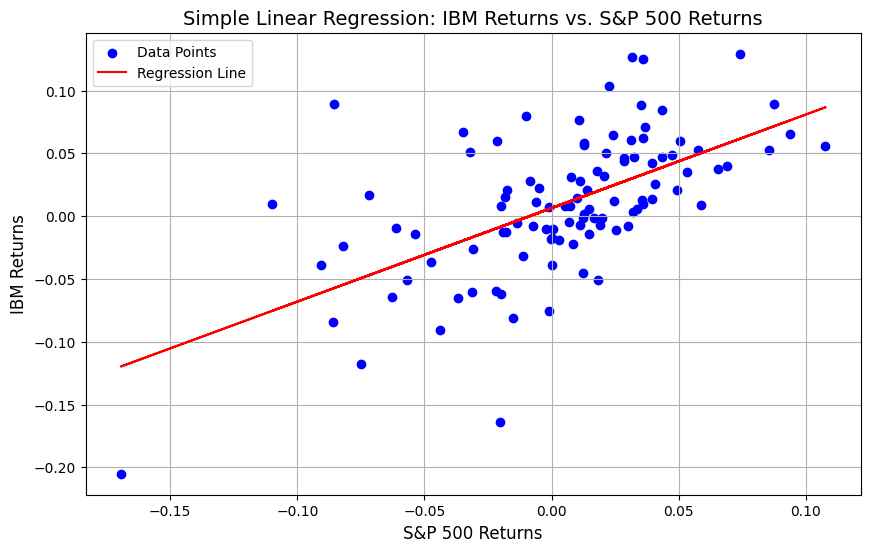

In [12]:

# Fit the linear regression model
model = sm.OLS(y_0, X_0).fit()

# Print the summary table of the regression model
print(model.summary())

# Optional: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['S_P500'], df['IBM'], color='blue', label='Data Points')
plt.plot(df['S_P500'], model.predict(X_0), color='red', label='Regression Line')
plt.title('Simple Linear Regression: IBM Returns vs. S&P 500 Returns', fontsize=14)
plt.xlabel('S&P 500 Returns', fontsize=12)
plt.ylabel('IBM Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()


### The value for Beta relating returns on S&P-500 to the returns on IBM
#####  -> 0.7448     

In [13]:

# Define the independent variable (S&P 500 returns) and dependent variable (IBM returns)
X_1 = df['S_P500']
y_1 = df['Apple']

# Add a constant to the independent variable
X_1 = sm.add_constant(X_1)


In [14]:
print(X_1, y_1)

     const  S_P500
0      1.0  0.0395
1      1.0 -0.0313
2      1.0  0.0495
3      1.0 -0.0150
4      1.0  0.0208
5      1.0  0.0181
6      1.0  0.0360
7      1.0  0.0111
8      1.0  0.0504
9      1.0  0.0071
10     1.0  0.0028
11     1.0 -0.0198
12     1.0  0.0242
13     1.0  0.0198
14     1.0  0.0126
15     1.0  0.0396
16     1.0 -0.0627
17     1.0 -0.0075
18     1.0  0.0313
19     1.0  0.0406
20     1.0  0.0436
21     1.0  0.0085
22     1.0 -0.0051
23     1.0  0.1077
24     1.0 -0.0718
25     1.0 -0.0568
26     1.0 -0.0215
27     1.0 -0.0183
28     1.0 -0.0135
29     1.0  0.0285
30     1.0 -0.0010
31     1.0  0.0320
32     1.0  0.0226
33     1.0  0.0653
34     1.0 -0.0023
35     1.0  0.0369
36     1.0  0.0876
37     1.0 -0.0474
38     1.0  0.0688
39     1.0 -0.0539
40     1.0 -0.0820
41     1.0  0.0148
42     1.0  0.0588
43     1.0  0.0285
44     1.0 -0.0370
45     1.0  0.0178
46     1.0  0.0574
47     1.0 -0.0198
48     1.0  0.0357
49     1.0  0.0336
50     1.0  0.0741
51     1.0  

                            OLS Regression Results                            
Dep. Variable:                  Apple   R-squared:                       0.290
Model:                            OLS   Adj. R-squared:                  0.283
Method:                 Least Squares   F-statistic:                     41.60
Date:                Mon, 30 Sep 2024   Prob (F-statistic):           3.80e-09
Time:                        03:33:19   Log-Likelihood:                 107.01
No. Observations:                 104   AIC:                            -210.0
Df Residuals:                     102   BIC:                            -204.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0249      0.009      2.889      0.0

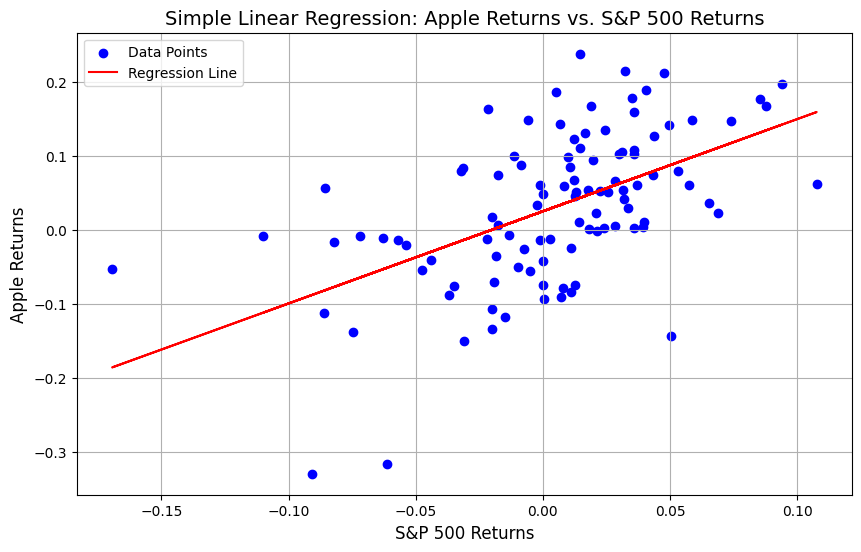

In [31]:

# Fit the linear regression model
model = sm.OLS(y_1, X_1).fit()

# Print the summary table of the regression model
print(model.summary())

# Optional: Plot the regression line
plt.figure(figsize=(10, 6))
plt.scatter(df['S_P500'], df['Apple'], color='blue', label='Data Points')
plt.plot(df['S_P500'], model.predict(X_1), color='red', label='Regression Line')
plt.title('Simple Linear Regression: Apple Returns vs. S&P 500 Returns', fontsize=14)
plt.xlabel('S&P 500 Returns', fontsize=12)
plt.ylabel('Apple Returns', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()



### The value for Beta relating returns on S&P-500 to the returns on Apple
#####  -> 1.2449      

# Calculating the sample standard deviations

In [32]:

stock_2_sample_std_dev = dict()

for col in df.columns[1:]:
    # Calculate standard deviation
    std_dev = df[col].std()  # Sample standard deviation (N-1) . default ddof is 1. so total obs. (N) - 1.
    std_dev_population = df[col].std(ddof=0)  # Population standard deviation (N)

    print("\n")    

    print(f"Sample Standard Deviation {col}:", std_dev)
    stock_2_sample_std_dev[col] = std_dev
    




Sample Standard Deviation S_P500: 0.04457852558188211


Sample Standard Deviation IBM: 0.055571051134871506


Sample Standard Deviation Apple: 0.10310404422155045


# Getting the correlation matrix

In [36]:
correlation_matrix_returns = df[['S_P500', 'IBM', 'Apple']].corr()
print(correlation_matrix_returns)
print(f"\nCorr matrix data type is:- {type(correlation_matrix_returns)}")

          S_P500       IBM     Apple
S_P500  1.000000  0.597478  0.538232
IBM     0.597478  1.000000  0.414725
Apple   0.538232  0.414725  1.000000

Corr matrix data type is:- <class 'pandas.core.frame.DataFrame'>


In [41]:
r_sp500_ibm = correlation_matrix_returns.iloc[0]['IBM']
print(f"Corr between S&P-500 and IBM {r_sp500_ibm}")
r_sp500_apple = correlation_matrix_returns.iloc[0]['Apple']
print(f"\nCorr between S&P-500 and Apple {r_sp500_apple}")

Corr between S&P-500 and IBM 0.5974779352335425

Corr between S&P-500 and Apple 0.5382316734516045


In [43]:
s_apple = stock_2_sample_std_dev["Apple"]
s_ibm = stock_2_sample_std_dev["IBM"]
s_sp500 = stock_2_sample_std_dev["S_P500"]
print( "sample std dev s&p-500:" , s_sp500)
print( "\nsample std dev IBM:" , s_ibm)
print( "\nsample std dev Apple:", s_apple)

sample std dev s&p-500: 0.04457852558188211

sample std dev IBM: 0.055571051134871506

sample std dev Apple: 0.10310404422155045


# Calculating r*(sx/sy)

In [22]:
r_sp500_ibm = correlation_matrix_returns.iloc[0]['IBM']
print(f"Corr between S&P-500 and IBM {r_sp500_ibm}")

0.5974779352335425


In [39]:
r_sp500_apple = correlation_matrix_returns.iloc[0]['Apple']
print(f"Corr between S&P-500 and IBM {r_sp500_apple}")

Corr between S&P-500 and IBM 0.5382316734516045


In [25]:
r__s_sp500__ibm = r_sp500_ibm * ( s_ibm / s_sp500 )
r__s_sp500__ibm

0.7448087718790547

In [26]:
r__s_sp500__apple = r_sp500_apple * ( s_apple / s_sp500 )
r__s_sp500__apple

1.244856386267461

### Looking at the metrics together

In [47]:
r_sp500_ibm = correlation_matrix_returns.iloc[0]['IBM']
print(f"Corr between S&P-500 and IBM {r_sp500_ibm}")
r_sp500_apple = correlation_matrix_returns.iloc[0]['Apple']
print(f"\nCorr between S&P-500 and Apple {r_sp500_apple}")

s_apple = stock_2_sample_std_dev["Apple"]
s_ibm = stock_2_sample_std_dev["IBM"]
s_sp500 = stock_2_sample_std_dev["S_P500"]
print("\n\n----------")
print( "\n\n\nsample std dev s&p-500:" , s_sp500)
print( "\nsample std dev IBM:" , s_ibm)
print( "\nsample std dev Apple:", s_apple)

print("\n\n----------")
print("r*sx/sy for s&p-500 and IBM", r__s_sp500__ibm)
print("\nr*sx/sy for s&p-500 and Apple", r__s_sp500__apple)

Corr between S&P-500 and IBM 0.5974779352335425

Corr between S&P-500 and Apple 0.5382316734516045


----------



sample std dev s&p-500: 0.04457852558188211

sample std dev IBM: 0.055571051134871506

sample std dev Apple: 0.10310404422155045


----------
r*sx/sy for s&p-500 and IBM 0.7448087718790547

r*sx/sy for s&p-500 and Apple 1.244856386267461


In [48]:
0.055571051134871506/0.04457852558188211 , 0.10310404422155045/0.04457852558188211

(1.2465879122179189, 2.312863489219003)

##### The expected return on APPLE in relation to returns on S&P-500 can be said to be
##### a function of the ratio of ->
-   ##### Sample standard deviation of APPLE returns (spread of APPLE returns data) and the same for S&P-500,
    ##### i.e., how many units of std deviation in 'APPLE stock returns' for every one unit std deviation in 'S&P-500 stock returns'.
    ##### This ratio is higher for the APPLE stock as compared to IBM's.

    ##### Multiplying this ratio with the correlation coefficient (which are almost comparable for the 2), yields a coefficient 
    ##### which gives a higher expected return for APPLE wrt S&P-500 in comparison against IBM's

